## 1. Continuous Time

$$
S_T = S_0\exp\left(\left(\mu - {1 \over 2}\sigma^{2}\right)T+\sigma \sqrt{T}z\right), \qquad z \to \N(0,1)
$$

$$\mathrm{drift} := \left(\mu - {1 \over 2}\sigma^{2}\right)T$$
$$\mathrm{diffusion} := \sigma \sqrt{T}$$

Average of S_mat    is 102.3743
Theoretical average is 102.0201


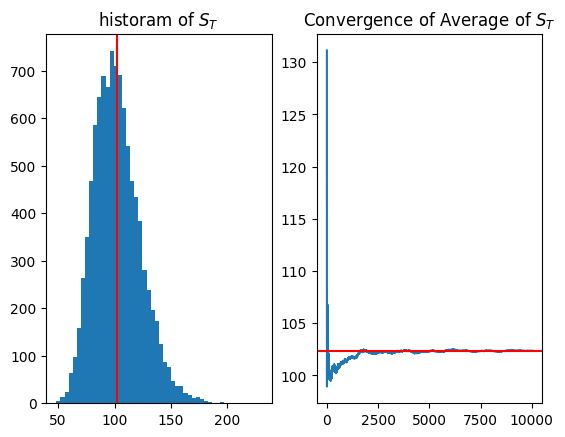

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

def make_GBM_path():
    s0 = 100
    mu = 0.02
    sigma = 0.2
    T = 1
    n_simulation = 10_000
    z_normal = np.random.normal(size=n_simulation)

    drift = (mu - 0.5 * sigma ** 2) * T
    diffusion = sigma * np.sqrt(T)
    s_mat = s0 * np.exp(drift + diffusion * z_normal)
    s_mat_avr = s_mat.mean()
    theoretical_avr = s0*np.exp(mu*T)
    print('Average of S_mat    is {:.4f}'.format(s_mat_avr))
    print('Theoretical average is {:.4f}'.format(theoretical_avr))

    s_step_avr = np.zeros(n_simulation)
    for i in range(n_simulation):
        s_step_avr[i] =s_mat[0:i+1].mean()


    plt.subplot(121)
    plt.hist(s_mat, bins=50)
    plt.axvline(s_mat_avr, color ='r')
    plt.title('historam of $S_T$')

    plt.subplot(122)
    plt.plot(s_step_avr)
    plt.axhline(s_mat_avr, color='r')
    plt.title('Convergence of Average of $S_T$')
    plt.show()

if __name__ == '__main__':
    make_GBM_path()

## 2. Discrete Base(everyday)

$$ S_{t_{i+1}} = S_{t_{i}} \exp \left(\left(\mu - {1 \over 2} \sigma^{2}\right)\left(t_{i+1}-t_{i}\right)+\sigma \left(W_{t_{i+1}}-W_{t_{i}}\right)\right)

Average of S_mat    is 102.0344
Theoretical average is 102.0201


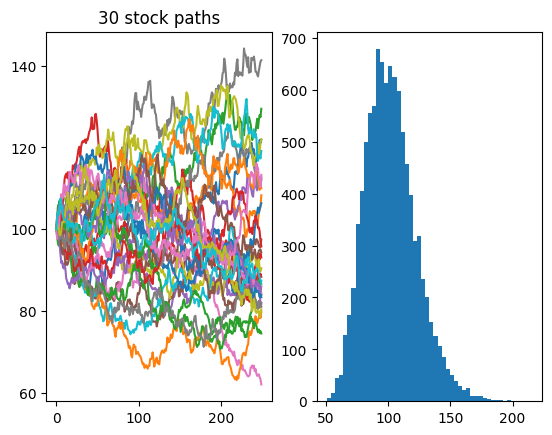

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

def make_GBM_path_nSteps():
    s0 = 100
    mu = 0.02
    sigma = 0.2
    T = 1
    days = 250
    dt = 1 / days

    n_simulation = 10_000
    n_steps = T * days

    zNormal = np.random.normal(size=(n_steps + 1, n_simulation))

    s_process = np.zeros((n_steps, n_simulation))
    s_process[0] = s0

    drift = (mu - 0.5 * sigma ** 2) * dt # Same as above code
    diffusion = sigma * np.sqrt(dt)

    for i in range(1, n_steps):
        s_process[i] = s_process[i - 1] * np.exp(drift + diffusion * zNormal[i])

    s_mat = s_process[-1]
    theoretical_avr = s0 * np.exp(mu * T)
    print('Average of S_mat    is {:.4f}'.format(s_mat.mean()))
    print('Theoretical average is {:.4f}'.format(theoretical_avr))

    plt.subplot(121)
    plt.plot(s_process[:, :30])
    plt.title('30 stock paths')

    plt.subplot(122)
    plt.hist(s_mat, bins=50)

    plt.show()

if __name__ == '__main__':
    make_GBM_path_nSteps()

## 3. Consider Dividend

terminal value of NO   DIVIDEND PATH : 90.93
terminal value of Cont DIVIDEND PATH : 82.27
terminal value of Disc DIVIDEND PATH : 80.93


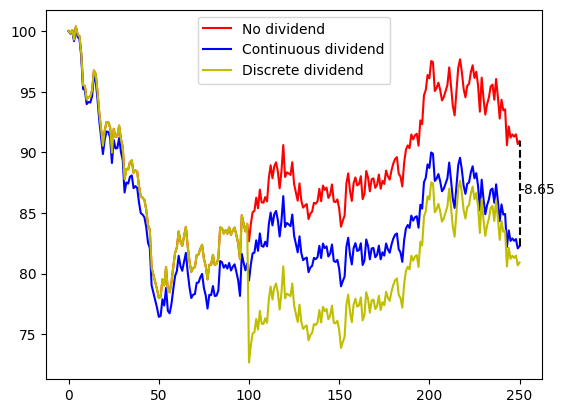

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

def dividend_test():
    s0 = 100    # initial stock price     
    mu = 0.02   # expected return; like rfr(risk free rate)  
    sigma = 0.2 # volatility of stock(assupmt 20%)
    T = 1       # expiry 1 year
    days = 250  # number of trading days in a year
    dt = 1 / days
    nSteps = T * days

    zNormal = np.random.normal(size = nSteps + 1) # 일수에 맞춰 주가생성을 위한 normal random number 생성
    s_process = np.zeros(nSteps +1) # 주가를 저장할 배열 생성
    s_process[0] = s0 # 초기 주가 설정; s0

    drift = (mu - 0.5 * sigma ** 2) * dt # 주가의 drift Term
    diffusion = sigma * np.sqrt(dt)     # 주가의 diffusion Term(Same as above code)

    cont_dividend = 0.1 # 연속배당률을 10%로 가정(눈에 잘 보이도록!)
    cont_div_process = np.zeros(nSteps + 1) # 연속배당률을 고려한 주가를 저장할 배열 생성
    cont_div_process[0] = s0 # 초기 주가 설정; s0

    disc_dividend = s0 * cont_dividend # 이산배당은 1년에 딱 한번, s0*q로
    exdiv_date = 100 # 배당이 나오는 날짜를 100일 뒤로 가정
    disc_div = np.zeros(nSteps + 1) # 이산배당률을 고려한 주가를 저장할 배열 생성

    disc_div[exdiv_date:] -= disc_dividend # 100일 뒤 이산배당을 고려한 주가 조정분

    cont_div_drift = (mu - cont_dividend - 0.5 * sigma ** 2) * dt # 연속배당의 drift Term
    for i in range(1, nSteps+1):
        s_process[i] = s_process[i - 1] * np.exp(drift + diffusion * zNormal[i]) # 배당고려 안한 주가 생성
        cont_div_process[i] = cont_div_process[i - 1] * np.exp(cont_div_drift + diffusion * zNormal[i]) # 연속배당 고려한 주가 생성

    disc_div_process = s_process + disc_div # 배당없는 주가 + 이산배당 고려

    print('terminal value of NO   DIVIDEND PATH : {:.2f}'.format(s_process[-1]))
    print('terminal value of Cont DIVIDEND PATH : {:.2f}'.format(cont_div_process[-1]))
    print('terminal value of Disc DIVIDEND PATH : {:.2f}'.format(disc_div_process[-1]))



    plt.plot(s_process, 'r', label='No dividend')
    plt.plot(cont_div_process, 'b', label='Continuous dividend')

    plt.plot(disc_div_process, 'y', label='Discrete dividend')
    plt.vlines(nSteps,cont_div_process[-1],s_process[-1], colors='k', linestyles ="dashed")
    plt.text(nSteps, np.mean([s_process[-1], cont_div_process[-1]]), round(cont_div_process[-1]-s_process[-1],2)  )
    plt.legend()
    plt.show()

if __name__ == '__main__':
    dividend_test()

### Reference

https://sine-qua-none.tistory.com/82